**Задание1**
Имеется выборка наблюдений некоторой случайной величины:
[114.2,114.0,132.5,141.8,107.0,126.9,85.7,149.6,145.5,130.7,88.5,111.8,187.7,102.2,117.6,113.5,144.4,104.4,137.4,149.8,111.7,121.9,96.5,138.7,113.1,126.0,129.9,138.5,110.8,129.4,203.1,124.1,121.5,126.9,114.0,128.0,93.2,116.6,113.3,122.9,115.5,78.7,105.3,113.2,135.8,121.1]
Требуется вычислить среднее значение, медиану, выборочную дисперсию и межквартильный размах. На основе анализа полученных значений и диаграммы box-plot сделать выводы о наличии аномальных наблюдений (выбросов). После отбраковки аномальных наблюдений (исключения их из выборки) заново вычислить среднее значение и медиану.

Среднее значение: 122.93
Медиана: 121.3
Стандартное отклонение: 22.68
Межквартильный размах: 19.93


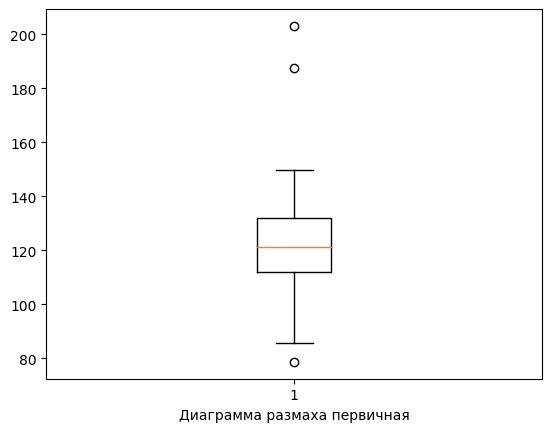

Выбросы: 78.7, 187.7, 203.1
Среднее значение после отбраковки аномальных выбросов:121.10
Медиана после отбраковки аномальных выбросов:120.59


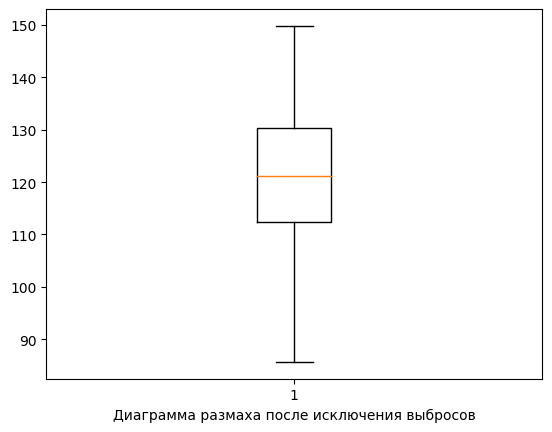

In [12]:
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
sample_ = []
sample = np.array([114.2,114.0,132.5,141.8,107.0,126.9,85.7,149.6,145.5,130.7,88.5,111.8,187.7,102.2,117.6,
                   113.5,144.4,104.4,137.4,149.8,111.7,121.9,96.5,138.7,113.1,126.0,129.9,138.5,110.8,129.4,
                   203.1,124.1,121.5,126.9,114.0,128.0,93.2,116.6,113.3,122.9,115.5,78.7,105.3,113.2,135.8,121.1])
mdn_ = np.median(sample)
mean_ = np.mean(sample)
st_ot_ = statistics.stdev(sample)
m_raz_ = np.percentile(sample, 75) - np.percentile(sample, 25)
print(f'Среднее значение: {mean_:.2f}')
print('Медиана:', mdn_)
print(f'Стандартное отклонение: {st_ot_:.2f}')
print(f'Межквартильный размах: {m_raz_:.2f}')
plt.boxplot(sample)
plt.xlabel('Диаграмма размаха первичная')
plt.show()
print(f'Выбросы: 78.7, 187.7, 203.1')
sample_2 = np.array([114.2,114.0,132.5,141.8,107.0,126.9,85.7,149.6,145.5,130.7,88.5,111.8,102.2,117.6,
                   113.5,144.4,104.4,137.4,149.8,111.7,121.9,96.5,138.7,113.1,126.0,129.9,138.5,110.8,129.4
                   ,124.1,121.5,126.9,114.0,128.0,93.2,116.6,113.3,122.9,115.5,105.3,113.2,135.8,121.1])
print(f'Среднее значение после отбраковки аномальных выбросов:{np.median(sample_2):.2f}')
print(f'Медиана после отбраковки аномальных выбросов:{np.mean(sample_2):.2f}')
plt.boxplot(sample_2)
plt.xlabel('Диаграмма размаха после исключения выбросов')
plt.show()

**Задание 2.** Из 300 абитуриентов, поступивших в институт, 97 человек имели пятерку в школе и 48 получили пятерку на вступительных экзаменах потому же предмету, причем только 18 человек имели пятерку и в школе, и на экзамене. С уровнем значимости 0.05 проверить гипотезу о независимости оценок 5 в школе и на вступительном экзамене.

In [13]:
from scipy.stats import chi2_contingency

contingency = [[97,18],[155,30]]
res = chi2_contingency(contingency)
print('stat=%.3f, p-value=%.3f' % (res.statistic, res.pvalue))
print(f'Гипотеза о независимости не отвергается. {res.pvalue:.3f} больше уровня значимости 0.05')


stat=0.000, p-value=1.000
Гипотеза о независимости не отвергается. 1.000 больше уровня значимости 0.05


**Задание 3.** Мука расфасовывается в пакеты так, чтобы вес одного пакета был 10кг.В результате измерения веса 20 случайно выбранных пакетов получены измерения:[9.473,10.016,9.703,10.306,10.102,10.002,9.655,10.077,10.084,9.775,10.225,9.861,9.887,9.964,9.974,10.132,10.182,9.788,10.225,9.757] 1) Вычислить оценки максимального правдоподобия параметров нормального распределения. 2) Проверить гипотезу о нормальном распределении измерений. 3) Изобразить на одной диаграмме график эмпирической функции распределения по выборке и график функции нормального распределения с полученными оценками параметров.

Параметры оценки максимального правдоподобия: loc=9.959399993557973, scale=0.21327901321995868
Гипотеза о нормальном распределении не отвергается. p_value: 0.839 больше уровня значимости 0.05


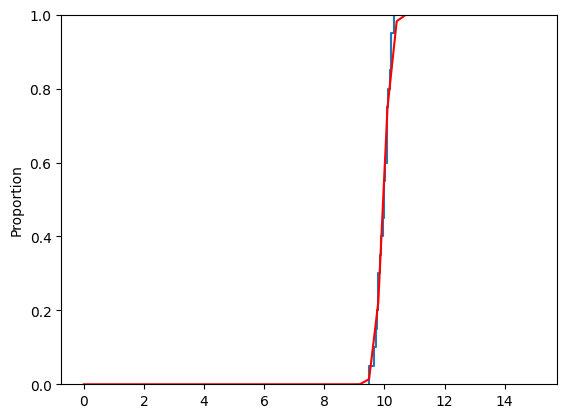

In [14]:
import scipy.stats as sps
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

sample_new = [9.473,10.016,9.703,10.306,10.102,10.002,9.655,10.077,10.084,9.775,10.225,9.861,9.887,9.964,9.974,10.132,10.182,9.788,10.225,9.757]

dist = sps.norm
bounds = [(min(sample_new), max(sample_new)), (0, 2)]
res_mle = sps.fit(dist, sample_new, bounds, method='mle')
mle = list(res_mle.params)
print(f'Параметры оценки максимального правдоподобия: loc={mle[0]}, scale={mle[1]}')

res = sps.goodness_of_fit(dist, sample_new, statistic = 'ad')
print(f'Гипотеза о нормальном распределении не отвергается. p_value: {res.pvalue:.3f} больше уровня значимости 0.05')

norm_mle = sps.norm(loc=mle[0], scale=mle[1])
sbn.ecdfplot(sample_new) # график эмпирической функции распределения
x = np.linspace(0,15)
y = norm_mle.cdf(x) # функция нормального распределения с оценками MLE
plt.plot(x, y, color='r')
plt.show()